# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

You can use a Python code similar to the following one to observe how the sampled points distribute into the 3D space:

### Resolution

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Starting point at r = 0 $a_0$

Pictures of the estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a  $M = 10^6$, with respect of the number of blocks $N$.

After some trials, the best number of blocks seems to be $N=100$.

The 2 graph in each picture represente the convergence of $\langle r \rangle $ in the case of uniform and Gaussian step, with 100 steps of equilibration.

For the Uniform Step case, the step are $1.2$ large for $\Psi_{1,0,0}$ and $2.9$ large  for $\Psi_{2,1,0}$, in order to have an acceptance of $\simeq 50 \%$.

For the Gaussian Step case, the step are $0.75$ for $\Psi_{1,0,0}$ and $1.85$ large  for $\Psi_{2,1,0}$.

In this section the origin point is taken as the starting point, as we can expect that $(0,0,0)$ is symmetric and "near" to $\langle r \rangle$ for our system (see next section for another starting point).

In [80]:
point = []
err= []
step = ["Uniform" , "Gauss", "Multivariate"]

for s in step:
    for i in range (0,2):
        file = open("plot." +s+ str(i+1) + ".out")
        rude = file.read()
        data = rude.split(' ')
        n=int((len(data)-1)/2)
        x = np.zeros(n)
        y = np.zeros(n)
        file.close()
        for j in range(0,n):
            x[j] = float(data[ 2 * j ] )
            y[j] = float(data[ 2 * j + 1 ] )
        point.append(x)
        err.append(y)

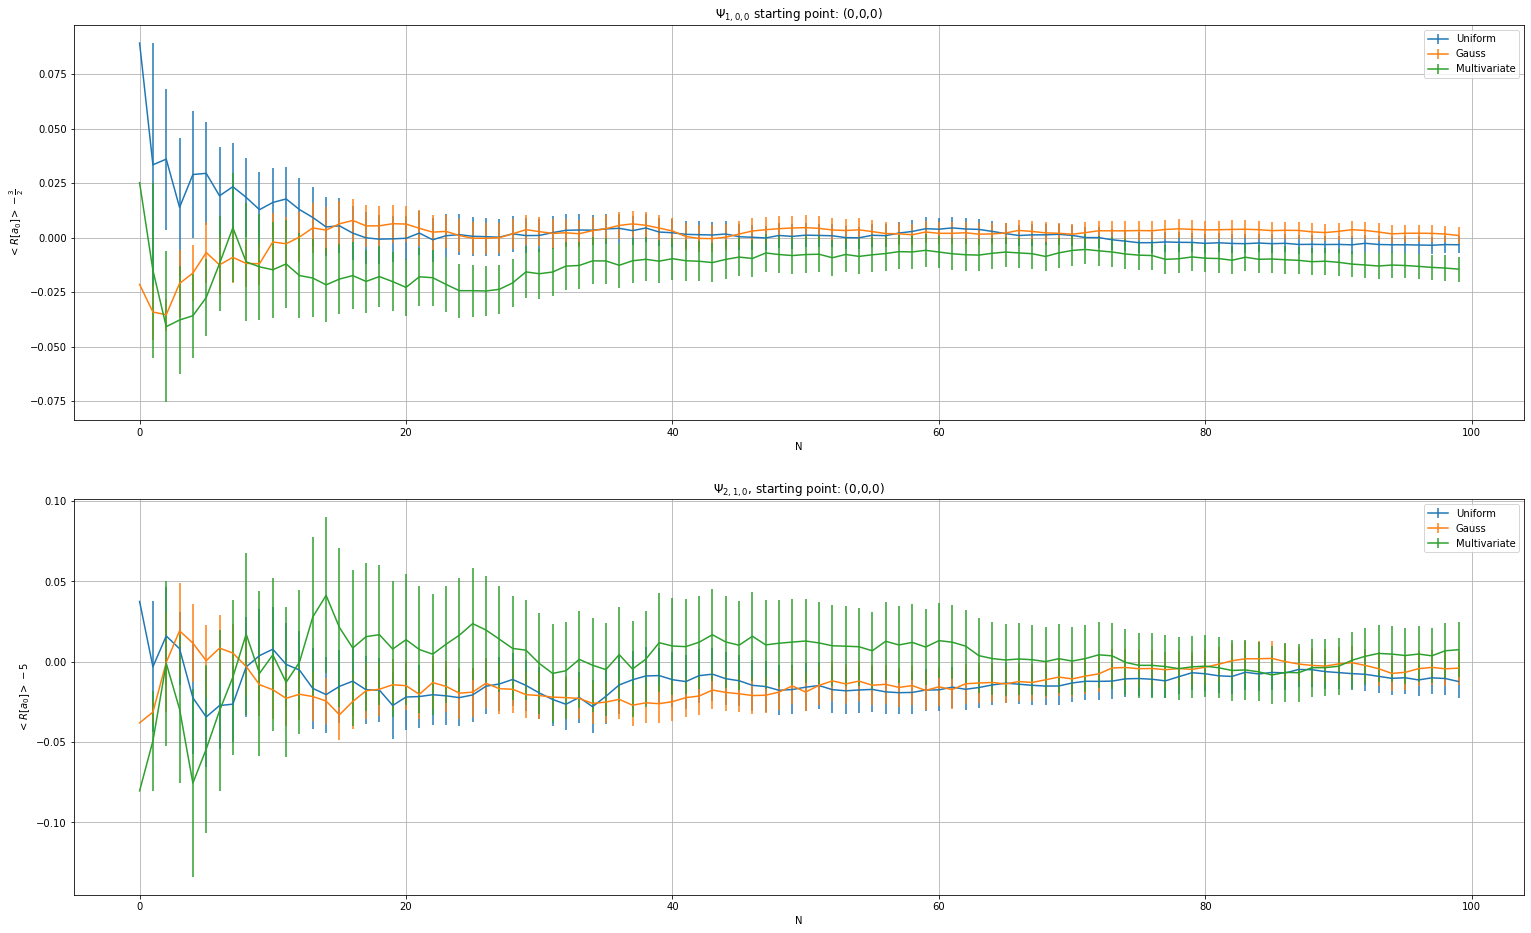

In [81]:
S = [r"$\Psi_{1,0,0}$ starting point: (0,0,0)", "$\Psi_{2,1,0}$, starting point: (0,0,0) "]
title = [r"$\frac{3}{2}$" , "5"]
results = [1.5 , 5]
fig, axx = plt.subplots(2, 1, figsize=(26, 16))
axx = axx.reshape(-1)
l = 0
for s in S:
    ax = axx[l]
    ax.set_title(s)
    ax.errorbar(np.arange(n) , point[l]-results[l] , yerr=err[l])
    ax.errorbar(np.arange(n) , point[l+2]-results[l] , yerr=err[l+2])
    ax.errorbar(np.arange(n) , point[l+4]-results[l] , yerr=err[l+4])
    ax.set_xlabel(r"N")
    ax.set_ylabel(r'$<R[a_0]> -$'+ title[l])
    ax.legend(['Uniform', 'Gauss', 'Multivariate'])
    l += 1
    ax.grid()

##### Comments
The two graph are compatible, and the Gaussian step one is more faster to converge at $\langle r \rangle$ than the Uniform one. The uncertainties are smaller for the 'Gaussian' graph.

In addiction the uncertainties for the $\Psi_{1,0,0}$ graph are smaller than $\Psi_{2,1,0}$ ones, as $\langle r \rangle _{\Psi_{1,0,0}} < \langle r \rangle _{\Psi_{2,1,0}}$

For the multivariate case, I took $\sigma = (1.25, 0.75, 0.25)$ for $n=1$ and  $\sigma = (2.85,1.85,0.85)$ for n=2, in order to have always $\sim 50\%$ of acceptance ratio. The results don't seem to be different, but the uncertainties are bigger. 

### Starting point at r = 100 $a_0$

Here the starting point of the simulation is taken at $r = 100 \ a_0$. Always after a period of equilibration of 100 steps.

In [82]:
point1 = []
err1= []
step = ["Uniform" , "Gauss"]
for s in step:
    for i in range (0,2):
        file = open("plot.far" + s + str(i+1) + ".out")
        rude = file.read()
        data = rude.split(' ')
        n=int((len(data)-1)/2)
        x = np.zeros(n)
        y = np.zeros(n)
        file.close()
        for j in range(0,n):
            x[j] = float(data[ 2 * j ] )
            y[j] = float(data[ 2 * j + 1 ] )
        point1.append(x)
        err1.append(y)

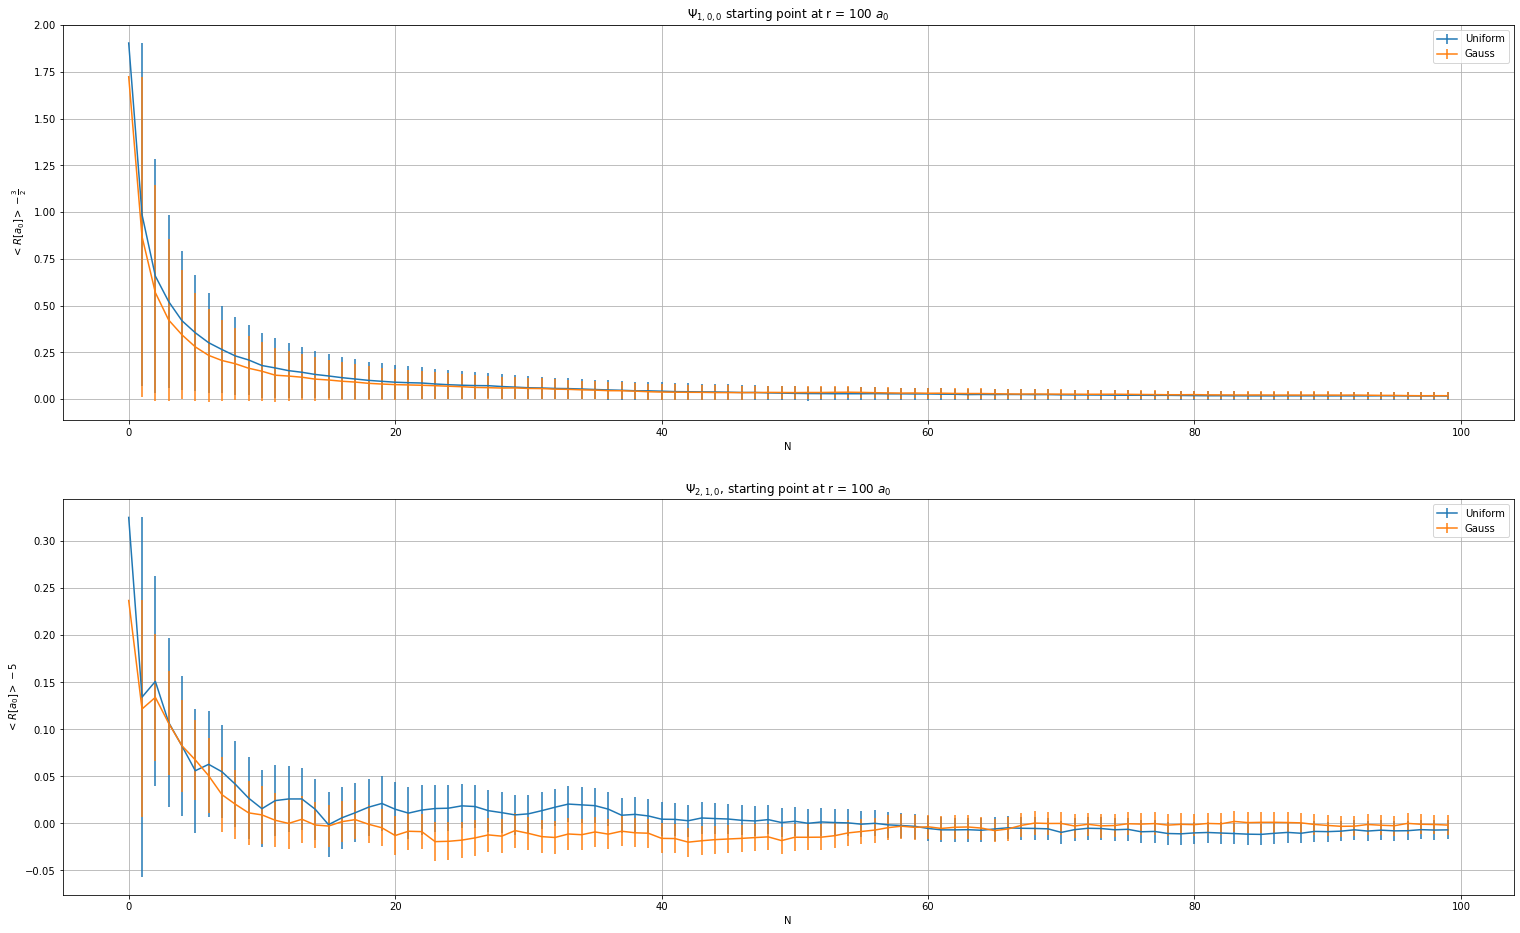

In [83]:
S1 = [r"$\Psi_{1,0,0}$ starting point at r = 100 $a_0$", "$\Psi_{2,1,0}$, starting point at r = 100 $a_0$"]
results = [1.5 , 5]
fig, axx = plt.subplots(2, 1, figsize=(26, 16))
axx = axx.reshape(-1)
l = 0
for s in S1:
    ax = axx[l]
    ax.set_title(s)
    ax.errorbar(np.arange(n) , point1[l]-results[l] , yerr=err1[l])
    ax.errorbar(np.arange(n) , point1[l+2]-results[l] , yerr=err1[l+2])
    ax.set_xlabel(r"N")
    ax.set_ylabel(r'$<R[a_0]> -$'+ title[l])
    ax.legend(['Uniform', 'Gauss'])
    l += 1
    ax.grid()

##### Comments
As we can see the two graphs are much "smoother" than the previous case, as the probability density, push $r$ to be smaller at every step, till $\langle r \rangle$ is reached.

Furthermore thw uncertainties are bigger, as the starting point is very far from $\langle r \rangle$.

In this case, we can clearly see that the gaussian graph is much faster than the uniform one.

For the n=2 case, the convergence is faster, because of the more nearness of $r = 5 \ a_0 $ to the starting point.

### Distribution

In [70]:
posx = []
posy = []
posz = []

for s in step:
    for i in range (0,2):
        file = open("print." + s + str(i+1) + ".out")
        rude = file.read()
        data = rude.split(' ')
        n=int((len(data)-1)/3)
        x = np.zeros(n)
        y = np.zeros(n)
        z = np.zeros(n)
        file.close()
        for j in range(0,n):
            x[j] = float(data[ 3 * j ] )
            y[j] = float(data[ 3 * j + 1 ] )
            z[j] = float(data[ 3 * j + 2 ] )
        posx.append(x)
        posy.append(y)
        posz.append(z)

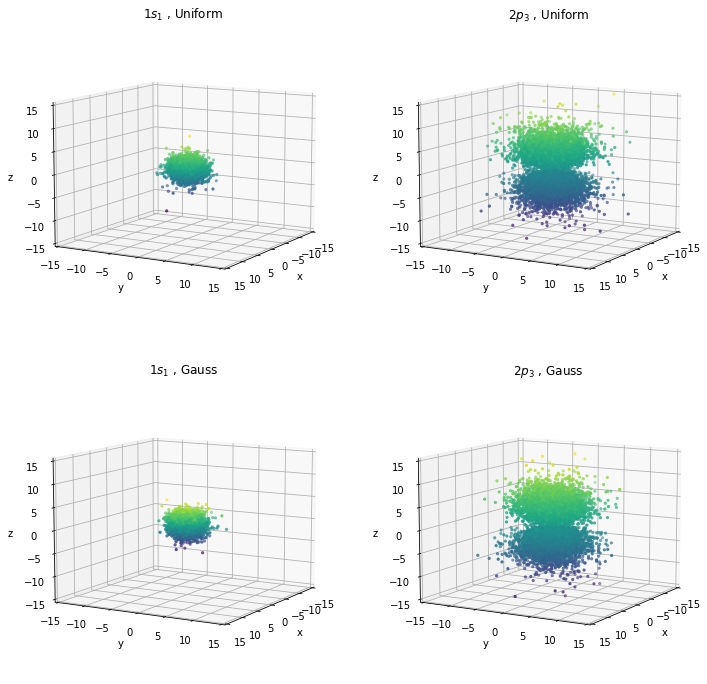

In [71]:
config = [r"$1s_1$", "$2p_3$"]
fig = plt.figure(figsize=(12,12))

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.scatter(posx[i], posy[i], posz[i], c=posz[i], marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    ax.set_zlim(-15,15)
    ax.view_init(10, 30)
    ax.set_title(config[i%2] + " , " + step[int(i/2)] )

These are the typical form of the atomic orbitals that we studied